In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()

In [5]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['target']=iris.target

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.shape

(150, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
df.skew()

sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
target               0.000000
dtype: float64

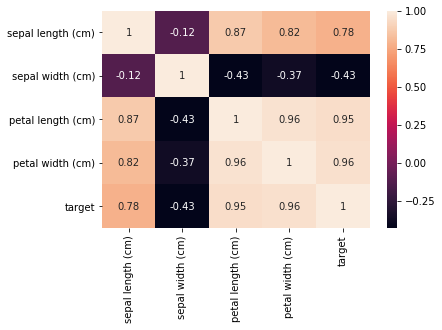

In [14]:
sns.heatmap(df.corr(),annot=True)

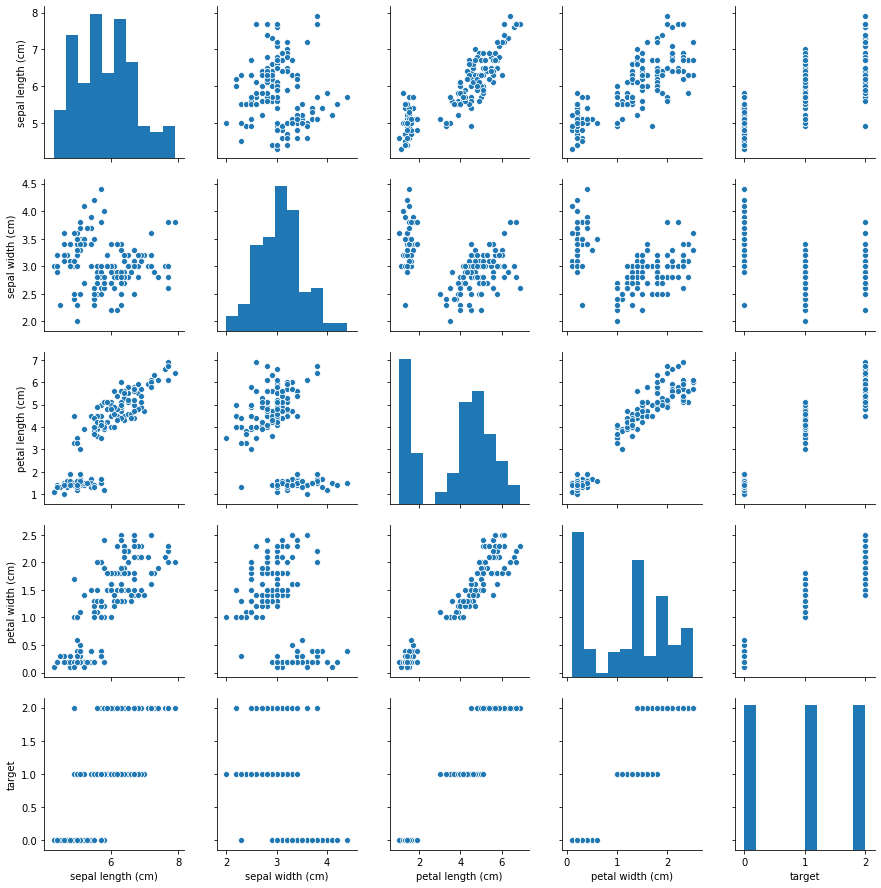

In [15]:
sns.pairplot(df)

In [16]:
X=df.drop('target',axis=1)
y=df.target

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [19]:
X_train_sc=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)

In [20]:
X_test_sc=pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [22]:
lgr=LogisticRegression()

In [23]:
rfe=RFE(lgr,3)

In [24]:
rfe=rfe.fit(X_train_sc,y_train)

In [25]:
list(zip(X_train_sc,rfe.support_,rfe.ranking_))

[('sepal length (cm)', False, 2),
 ('sepal width (cm)', True, 1),
 ('petal length (cm)', True, 1),
 ('petal width (cm)', True, 1)]

In [26]:
sel_col=X_train_sc.columns[rfe.support_]

In [27]:
X_train_sc_rfe=X_train_sc[sel_col]

In [28]:
X_train_sc_rfe.shape

(120, 3)

In [29]:
import statsmodels.api as sm

In [30]:
X_train_sc_rfe_sm=sm.add_constant(X_train_sc_rfe)

In [31]:
lgmod=sm.GLM(list(y_train),X_train_sc_rfe_sm,family=sm.families.Gaussian()).fit()

In [32]:
print(lgmod.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  120
Model:                            GLM   Df Residuals:                      116
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                        0.047883
Method:                          IRLS   Log-Likelihood:                 14.101
Date:                Tue, 24 Sep 2019   Deviance:                       5.5544
Time:                        08:16:55   Pearson chi2:                     5.55
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.0167      0.02

In [33]:
#check for the VIF value of feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
# create DF that vll contain all features variables and thier respective VIF
vif=pd.DataFrame()
vif['Features']=X_train_sc_rfe_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sc_rfe_sm.values,i) for i in range(X_train_sc_rfe_sm.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,petal length (cm),17.97
3,petal width (cm),16.87
1,sepal width (cm),1.29
0,const,1.00


In [35]:
X_train_sc_rfe_sm.drop('petal length (cm)',axis=1,inplace=True)

In [36]:
lgmod1=sm.GLM(list(y_train),X_train_sc_rfe_sm,family=sm.families.Gaussian()).fit()

In [37]:
print(lgmod.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  120
Model:                            GLM   Df Residuals:                      116
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                        0.047883
Method:                          IRLS   Log-Likelihood:                 14.101
Date:                Tue, 24 Sep 2019   Deviance:                       5.5544
Time:                        08:19:16   Pearson chi2:                     5.55
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.0167      0.02

In [38]:
#check for the VIF value of feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
# create DF that vll contain all features variables and thier respective VIF
vif=pd.DataFrame()
vif['Features']=X_train_sc_rfe_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sc_rfe_sm.values,i) for i in range(X_train_sc_rfe_sm.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,sepal width (cm),1.13
2,petal width (cm),1.13
0,const,1.00


In [39]:
y_train_sm_pred=lgmod1.predict(X_train_sc_rfe_sm)
len(y_train_sm_pred)

120

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [41]:
print('accuracy_score')
print(accuracy_score(y_train,y_train_sm_pred.round()))


accuracy_score
0.975


In [42]:
print('confusion matrix\n\n',confusion_matrix(y_train,y_train_sm_pred.round()))

confusion matrix

 [[40  0  0]
 [ 0 37  1]
 [ 0  2 40]]


In [43]:
print('\n\nclassification report: \n\n',classification_report(y_train,y_train_sm_pred.round()))




classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.97      0.96        38
           2       0.98      0.95      0.96        42

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



In [44]:
X_test_sc_rfe_sm=sm.add_constant(X_test_sc)

In [45]:
X_test_sc_rfe_sm1=X_test_sc_rfe_sm[X_train_sc_rfe_sm.columns]

In [47]:
y_pred_lgr_test=lgmod1.predict(X_test_sc_rfe_sm1)

In [51]:
print(' Accuracy Score:\n')
print(accuracy_score(y_test,y_pred_lgr_test.round()))

 Accuracy Score:

0.9333333333333333


In [52]:
print("confusion Matrix:\n\n",confusion_matrix(y_test,y_pred_lgr_test.round()))

confusion Matrix:

 [[10  0  0]
 [ 0 12  0]
 [ 0  2  6]]


In [54]:
print("\n\nClassification Report:\n",classification_report(y_test,y_pred_lgr_test.round()))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.86      1.00      0.92        12
           2       1.00      0.75      0.86         8

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



In [56]:
lgr.fit(X_train_sc_rfe,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_pred_lgr_train=lgr.predict(X_train_sc_rfe)

In [58]:
print('accurarcy',accuracy_score(y_train,y_pred_lgr_train))

accurarcy 0.9166666666666666


In [59]:
print('confusion matrix\n\n',confusion_matrix(y_train,y_pred_lgr_train))

confusion matrix

 [[40  0  0]
 [ 0 31  7]
 [ 0  3 39]]


In [64]:
print("\n\nClassification Report:\n",classification_report(y_train,y_pred_lgr_train))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.91      0.82      0.86        38
           2       0.85      0.93      0.89        42

    accuracy                           0.92       120
   macro avg       0.92      0.91      0.92       120
weighted avg       0.92      0.92      0.92       120



In [61]:
X_test_rfe=X_test[X_train_sc_rfe.columns]

In [62]:
y_pred_lgr_test=lgr.predict(X_test_rfe)

In [63]:
print('accurarcy',accuracy_score(y_test,y_pred_lgr_test))
print('confusion matrix\n\n',confusion_matrix(y_test,y_pred_lgr_test))
print('\n\nclassification report: \n\n',classification_report(y_test,y_pred_lgr_test))


accurarcy 0.43333333333333335
confusion matrix

 [[ 5  0  5]
 [ 0  0 12]
 [ 0  0  8]]


classification report: 

               precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.00      0.00      0.00        12
           2       0.32      1.00      0.48         8

    accuracy                           0.43        30
   macro avg       0.44      0.50      0.38        30
weighted avg       0.42      0.43      0.35        30

